# Explore here

import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import pymysql

import requests
import sklearn 
import seaborn as sns 
import sqlalchemy
import sympy
import xgboost


In [3]:
path = kagglehub.dataset_download("samayashar/fraud-detection-transactions-dataset")
print("Path to dataset files:", path)

100%|██████████| 2.01M/2.01M [00:00<00:00, 17.1MB/s]

Extracting files...
Path to dataset files: /home/vscode/.cache/kagglehub/datasets/samayashar/fraud-detection-transactions-dataset/versions/1


In [4]:
df = pd.read_csv(f"{path}/synthetic_fraud_dataset.csv")
df.head()

Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00          1588.96      Tablet    Mumbai   
3  2023-12-07 00:31:00         76807.20      Tablet  New York   
4  2023-11-11 23:44:00         92354.66      Mobile    Mumbai   

  Merchant_Category  IP_Address_Flag  ...  Daily_Transaction_Count  \
0            Travel                0  ...                        7   
1          Clothing                0  ...                       13   
2       Restaurants                0  ...                       14   
3          Clothing                0  ...                        8   
4       Electronics                0  ...                       14   

   Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d   Card_Type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

  Card_Age  Transaction_Distance  Authentication_Method Risk_Score  \
0       65                883.17              Biometric     0.8494   
1      186               2203.36               Password     0.0959   
2      226               1909.29              Biometric     0.8400   
3       76               1311.86                    OTP     0.7935   
4      140                966.98               Password     0.3819   

   Is_Weekend  Fraud_Label  
0           0            0  
1           0            1  
2           0            1  
3           0            1  
4           1            1  

[5 rows x 21 columns]

Guardamos la informacion

In [5]:
df.to_csv("../data/raw/df.csv", index = False)

Guardamos la Base de Datos en SQL

In [6]:
from sqlalchemy import create_engine

In [7]:
import sqlite3
import pandas as pd

# Conexión a SQLite y creación de la tabla
conn = sqlite3.connect('synthetic_fraud_dataset.db')
cursor = conn.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS synthetic_fraud_data (
    Transaction_ID TEXT,
    User_ID TEXT,
    Transaction_Amount REAL,
    Transaction_Type TEXT,
    Timestamp TEXT,
    Account_Balance REAL,
    Device_Type TEXT,
    Location TEXT,
    Merchant_Category TEXT,
    IP_Address_Flag INTEGER,
    Previous_Fraudulent_Activity INTEGER,
    Daily_Transaction_Count INTEGER,
    Avg_Transaction_Amount_7d REAL,
    Failed_Transaction_Count_7d INTEGER,
    Card_Type TEXT,
    Card_Age INTEGER,
    Transaction_Distance REAL,
    Authentication_Method TEXT,
    Risk_Score REAL,
    Is_Weekend INTEGER,
    Fraud_Label INTEGER
)
''')

# Leer el CSV y guardar en SQLite
df = pd.read_csv(f'{path}/synthetic_fraud_dataset.csv')
df.to_sql('synthetic_fraud_data', conn, if_exists='replace', index=False)

# Verificar la inserción en formato tabla
query = 'SELECT * FROM synthetic_fraud_data LIMIT 10'  # Solo algunas filas para no saturar
df_verificacion = pd.read_sql(query, conn)
print("\nPrimeras filas de la tabla:")
print(df_verificacion)

# Consulta: obtener filas con fraude y mostrarlas como tabla
fraud_query = 'SELECT * FROM synthetic_fraud_data WHERE Fraud_Label = 1 LIMIT 10'
df_fraude = pd.read_sql(fraud_query, conn)
print("\nTransacciones fraudulentas:")
print(df_fraude)

# Consulta: contar el número de filas
count_query = 'SELECT COUNT(*) AS total_filas FROM synthetic_fraud_data'
df_count = pd.read_sql(count_query, conn)
print("\nNúmero total de filas:")
print(df_count)

# Cerrar la conexión
conn.close()



Primeras filas de la tabla:
  Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   
5      TXN_42724  USER_6852              168.55           Online   
6      TXN_10822  USER_5052                3.79              POS   
7      TXN_49498  USER_4660                7.08   ATM Withdrawal   
8       TXN_4144  USER_1584               34.25   ATM Withdrawal   
9      TXN_36958  USER_9498               16.24              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00     

Analisis Descriptivo

In [8]:
df.shape

(50000, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

1:comportamiento de transacciones 
2:cuentas mayores con movimientos atipicos 
3:horarios de transacciones con cargos altos
4:metodos de autenticacion

Eliminamos Informacion irrelevante

In [10]:
#Eliminamos posibles valores duplicados
df.drop_duplicates
df.shape

(50000, 21)

In [11]:
df.drop(["IP_Address_Flag"],axis = 1, inplace = True)
df.head()

Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00          1588.96      Tablet    Mumbai   
3  2023-12-07 00:31:00         76807.20      Tablet  New York   
4  2023-11-11 23:44:00         92354.66      Mobile    Mumbai   

  Merchant_Category  Previous_Fraudulent_Activity  Daily_Transaction_Count  \
0            Travel                             0                        7   
1          Clothing                             0                       13   
2       Restaurants                             0                       14   
3          Clothing                             0                        8   
4       Electronics                             1                       14   

   Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d   Card_Type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

   Card_Age  Transaction_Distance Authentication_Method  Risk_Score  \
0        65                883.17             Biometric      0.8494   
1       186               2203.36              Password      0.0959   
2       226               1909.29             Biometric      0.8400   
3        76               1311.86                   OTP      0.7935   
4       140                966.98              Password      0.3819   

   Is_Weekend  Fraud_Label  
0           0            0  
1           0            1  
2           0            1  
3           0            1  
4           1            1

Convertimos las variables categoricasa dtype

In [12]:
var_categoricas = ["Transaction_Type", "Device_Type", "Location", "Merchant_Category", "Card_Type", "Authentication_Method"]
df[var_categoricas] = df[var_categoricas].astype("category")

Convertimos las variables binarias a integrales

In [13]:
var_bin = ['Previous_Fraudulent_Activity', 'Is_Weekend', 'Fraud_Label']
df[var_bin] = df[var_bin].astype(int)

Estandarizamos las variables numericas

In [14]:
from sklearn.preprocessing import StandardScaler
var_num = ['Transaction_Amount', 'Account_Balance', 'Daily_Transaction_Count', 
                'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 
                'Card_Age', 'Transaction_Distance', 'Risk_Score']

scaler = StandardScaler()
df[var_num] = scaler.fit_transform(df[var_num])

In [15]:
# Estadísticas descriptivas
print(df.describe())

       Transaction_Amount  Account_Balance  Previous_Fraudulent_Activity  \
count        5.000000e+04     5.000000e+04                  50000.000000   
mean        -2.856382e-17    -1.905320e-16                      0.098400   
std          1.000010e+00     1.000010e+00                      0.297858   
min         -1.007344e+00    -1.731338e+00                      0.000000   
25%         -7.167510e-01    -8.671044e-01                      0.000000   
50%         -3.014705e-01     3.141985e-03                      0.000000   
75%          3.996653e-01     8.630362e-01                      0.000000   
max          1.089036e+01     1.728232e+00                      1.000000   

       Daily_Transaction_Count  Avg_Transaction_Amount_7d  \
count             5.000000e+04               5.000000e+04   
mean             -1.378453e-17               7.773338e-17   
std               1.000010e+00               1.000010e+00   
min              -1.605418e+00              -1.734831e+00   
25%       

In [16]:
# Medidas estadísticas adicionales
print(f"Media:")
print(df.mean(numeric_only=True))

print(f"Mediana:")
print(df.median(numeric_only=True))

print(f"Moda:")
print(df.mode().iloc[0])

print(f"Desviación estándar:")
print(df.std(numeric_only=True))

print(f"Varianza:")
print(df.var(numeric_only=True))

print(f"Rango:")
print(df.max(numeric_only=True) - df.min(numeric_only=True))

Media:
Transaction_Amount             -2.856382e-17
Account_Balance                -1.905320e-16
Previous_Fraudulent_Activity    9.840000e-02
Daily_Transaction_Count        -1.378453e-17
Avg_Transaction_Amount_7d       7.773338e-17
Failed_Transaction_Count_7d    -5.613288e-17
Card_Age                        6.949108e-17
Transaction_Distance            1.382006e-16
Risk_Score                      7.659651e-17
Is_Weekend                      2.996400e-01
Fraud_Label                     3.213400e-01
dtype: float64
Mediana:
Transaction_Amount             -3.014705e-01
Account_Balance                 3.141985e-03
Previous_Fraudulent_Activity    0.000000e+00
Daily_Transaction_Count        -1.201209e-01
Avg_Transaction_Amount_7d       5.750959e-03
Failed_Transaction_Count_7d    -2.503078e-03
Card_Age                        8.697527e-07
Transaction_Distance           -5.810790e-03
Risk_Score                      2.413313e-03
Is_Weekend                      0.000000e+00
Fraud_Label             

<Axes: xlabel='Transaction_Amount', ylabel='Card_Type'>

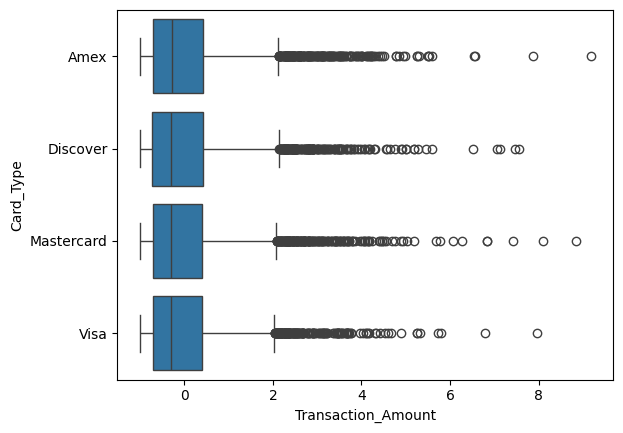

In [17]:
sns.boxplot(x=df.query("Fraud_Label==1").Transaction_Amount,y=df.query("Fraud_Label==1").Card_Type)

<Axes: xlabel='Transaction_Amount', ylabel='Card_Type'>

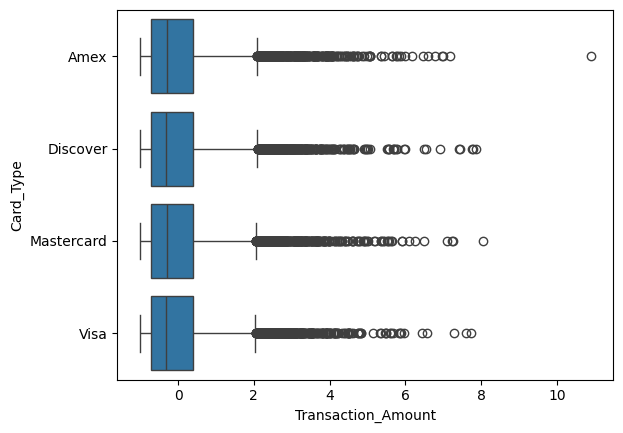

In [18]:
sns.boxplot(x=df.query("Fraud_Label==0").Transaction_Amount,y=df.query("Fraud_Label==0").Card_Type)

In [19]:
df.groupby(["Authentication_Method","Fraud_Label"]).size().reset_index()
df2 = df.groupby(["Authentication_Method","Fraud_Label"]).size().reset_index()
df2 = df2.rename(columns={0: "valor"})
print (df2)

  Authentication_Method  Fraud_Label  valor
0             Biometric            0   8553
1             Biometric            1   4038
2                   OTP            0   8345
3                   OTP            1   4021
4                   PIN            0   8608
5                   PIN            1   3978
6              Password            0   8427
7              Password            1   4030


/tmp/ipykernel_5507/1070938346.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Authentication_Method","Fraud_Label"]).size().reset_index()
/tmp/ipykernel_5507/1070938346.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby(["Authentication_Method","Fraud_Label"]).size().reset_index()


<Axes: xlabel='Authentication_Method', ylabel='Count'>

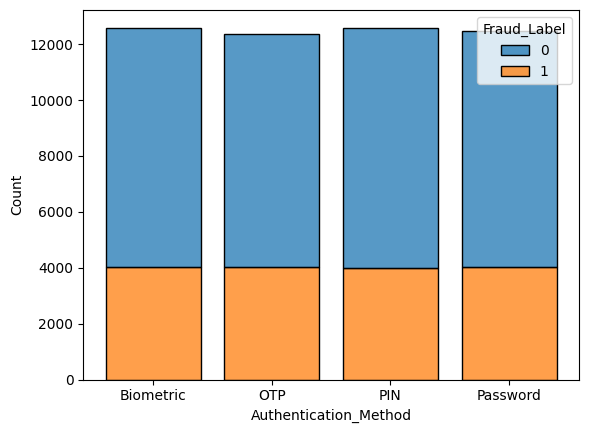

In [20]:
sns.histplot(df2, x="Authentication_Method", weights="valor", hue="Fraud_Label", multiple="stack", shrink=0.8)

**EDA**

Analisis de variables univariante

Analisis sobre variables categoricas

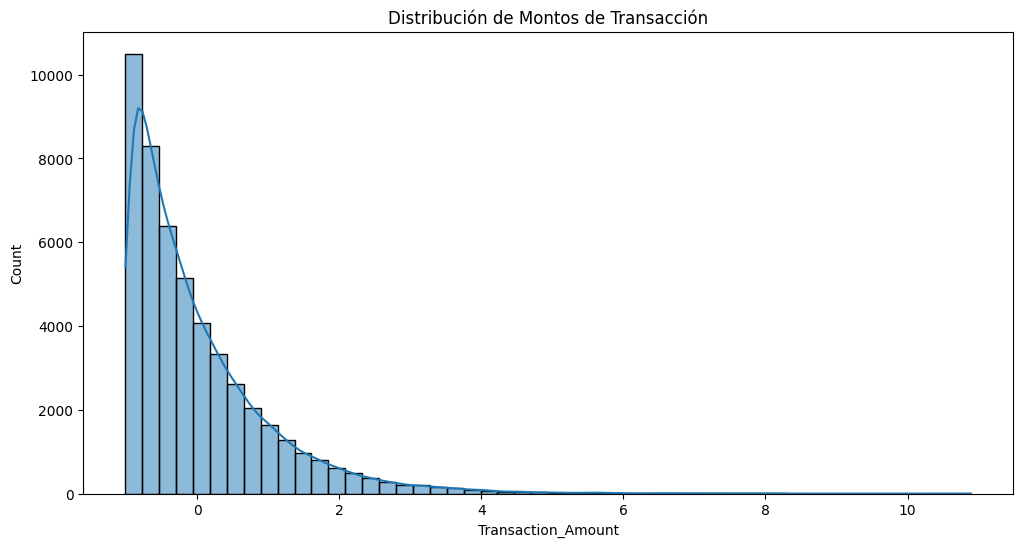

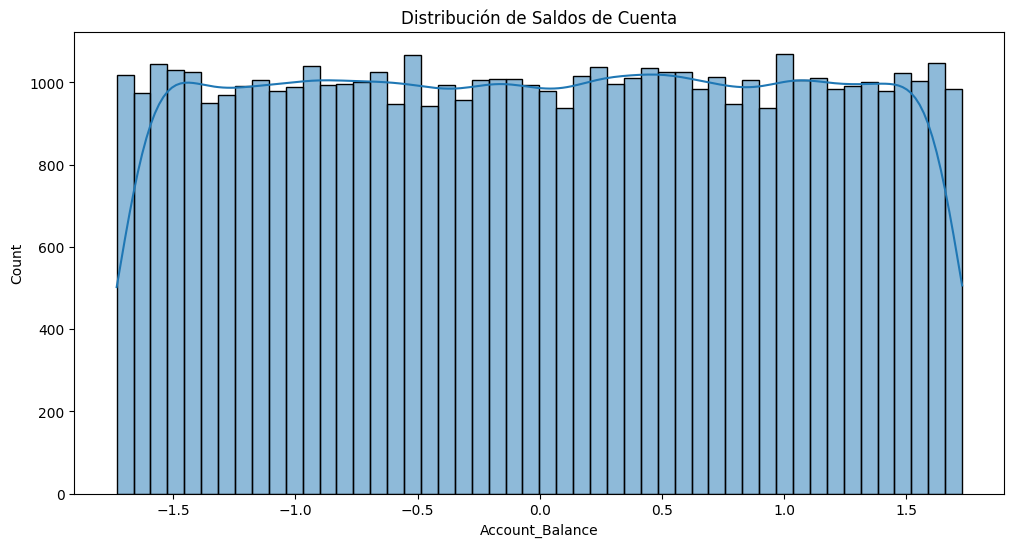

In [21]:
# Distribuciones de montos y saldos
plt.figure(figsize=(12, 6))
sns.histplot(df['Transaction_Amount'], bins=50, kde=True)
plt.title('Distribución de Montos de Transacción')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Account_Balance'], bins=50, kde=True)
plt.title('Distribución de Saldos de Cuenta')
plt.show()

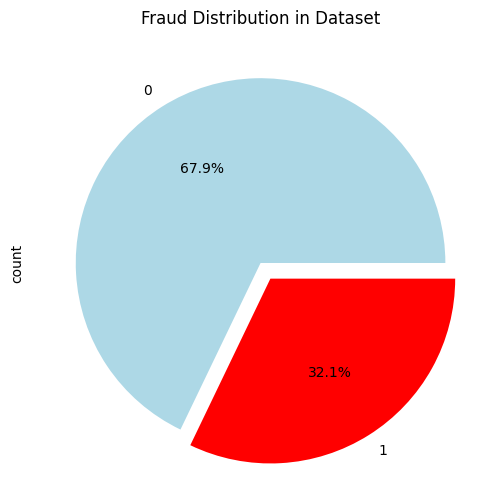

In [22]:
plt.figure(figsize=(6, 6))
df['Fraud_Label'].value_counts().plot.pie(autopct='%1.1f%%', colors=["lightblue", "red"], explode=[0, 0.1])
plt.title("Fraud Distribution in Dataset")
plt.show()

In [23]:
# Convertir Timestamp a datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [24]:
# Crear nuevas características de tiempo
df['Transaction_Year'] = df['Timestamp'].dt.year
df['Transaction_Month'] = df['Timestamp'].dt.month
df['Transaction_Day'] = df['Timestamp'].dt.day
df['Transaction_Hour'] = df['Timestamp'].dt.hour

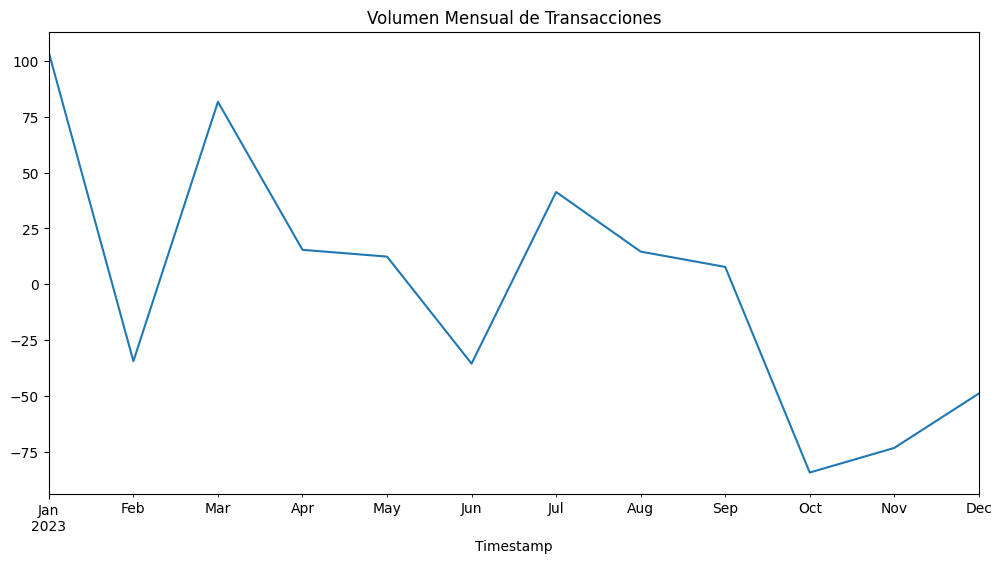

In [25]:
# Transacciones a lo largo del tiempo
df.set_index('Timestamp')['Transaction_Amount'].resample('ME').sum().plot(figsize=(12, 6))
plt.title('Volumen Mensual de Transacciones')
plt.show()

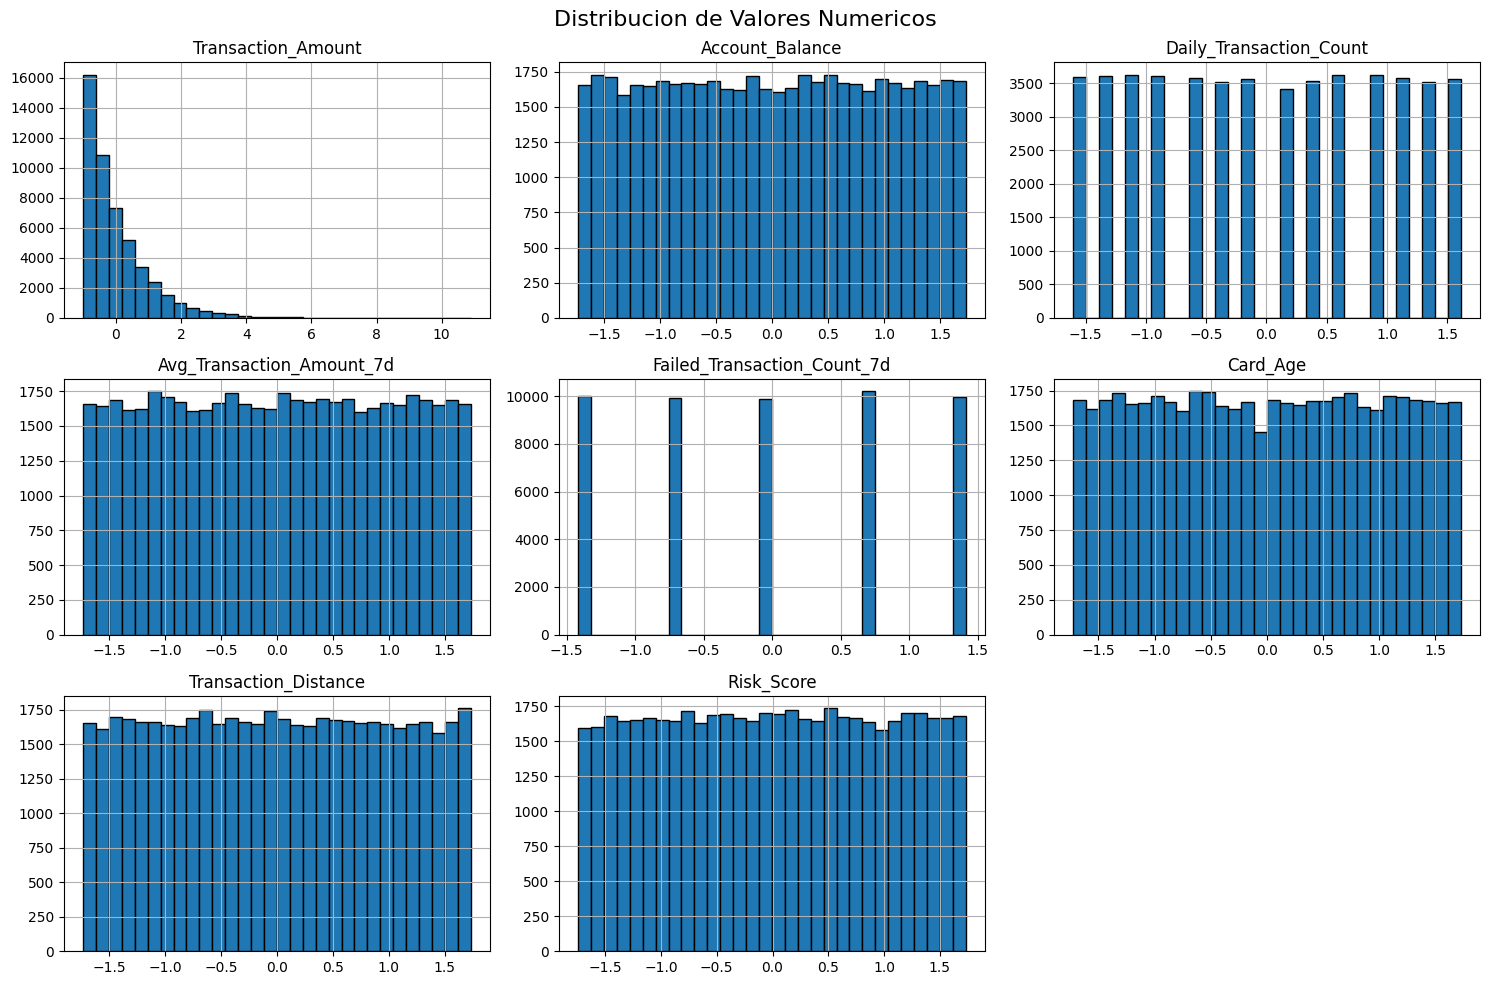

In [26]:
df[var_num].hist(bins=30, figsize=(15, 10), layout=(3, 3), edgecolor='black')
plt.suptitle("Distribucion de Valores Numericos", fontsize=16)
plt.tight_layout()
plt.show()

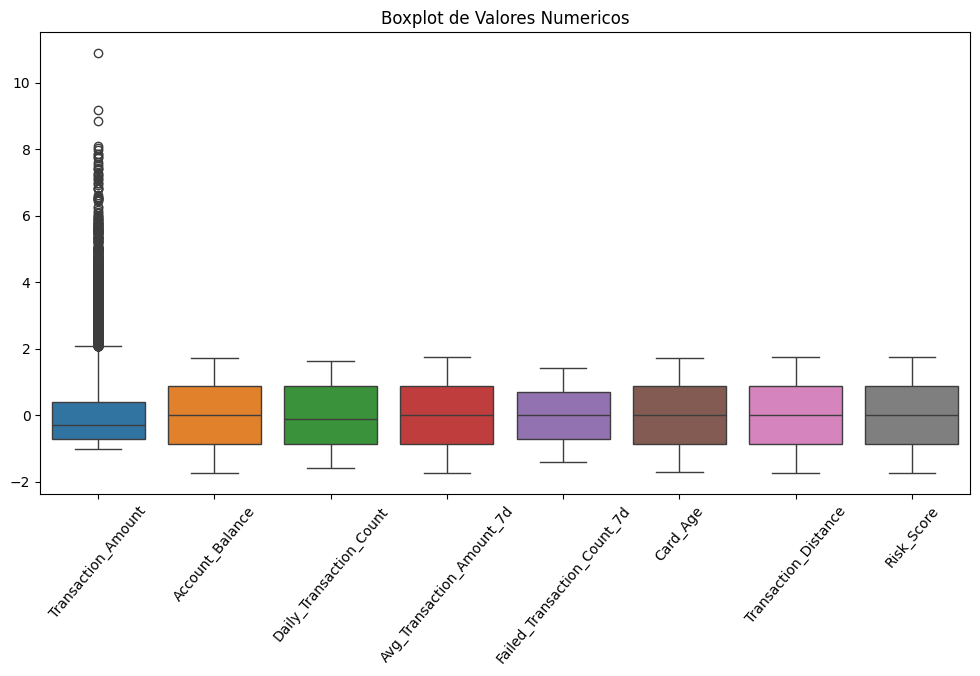

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[var_num])
plt.xticks(rotation=50)
plt.title("Boxplot de Valores Numericos")
plt.show()

Analisis sobre variables numericas en singular

In [28]:
# Codificar columnas categóricas
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Transaction_Type'] = encoder.fit_transform(df['Transaction_Type'])
df['Device_Type'] = encoder.fit_transform(df['Device_Type'])
df['Location'] = encoder.fit_transform(df['Location'])

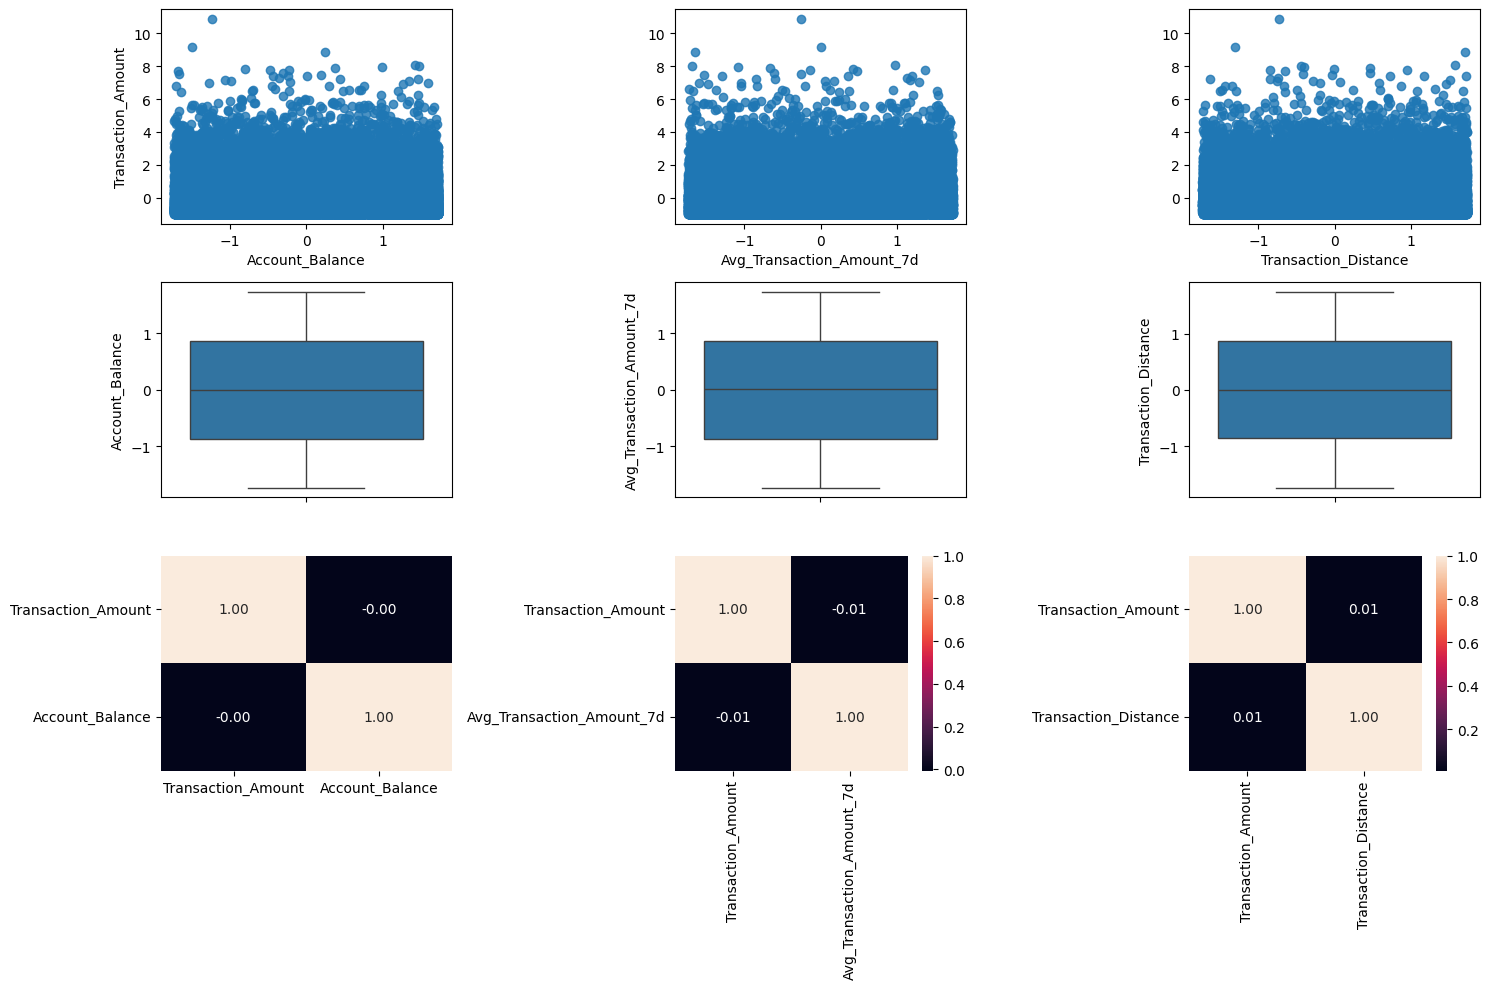

In [29]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.regplot(ax = axis[0, 0], data = df, x = "Account_Balance", y = "Transaction_Amount")
sns.heatmap(df[["Transaction_Amount", "Account_Balance"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 0], cbar = False)
sns.boxplot(ax = axis[1, 0], data = df, y = "Account_Balance")
sns.regplot(ax = axis[0, 1], data = df, x = "Avg_Transaction_Amount_7d", y = "Transaction_Amount").set(ylabel=None)
sns.heatmap(df[["Transaction_Amount", "Avg_Transaction_Amount_7d"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 1])
sns.boxplot(ax = axis[1, 1], data = df, y = "Avg_Transaction_Amount_7d")
sns.regplot(ax = axis[0, 2], data = df, x = "Transaction_Distance", y = "Transaction_Amount").set(ylabel=None)
sns.heatmap(df[["Transaction_Amount", "Transaction_Distance"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 2])
sns.boxplot(ax = axis[1, 2], data = df, y = "Transaction_Distance")
plt.tight_layout()
plt.show()

Analisis de variables multivariante

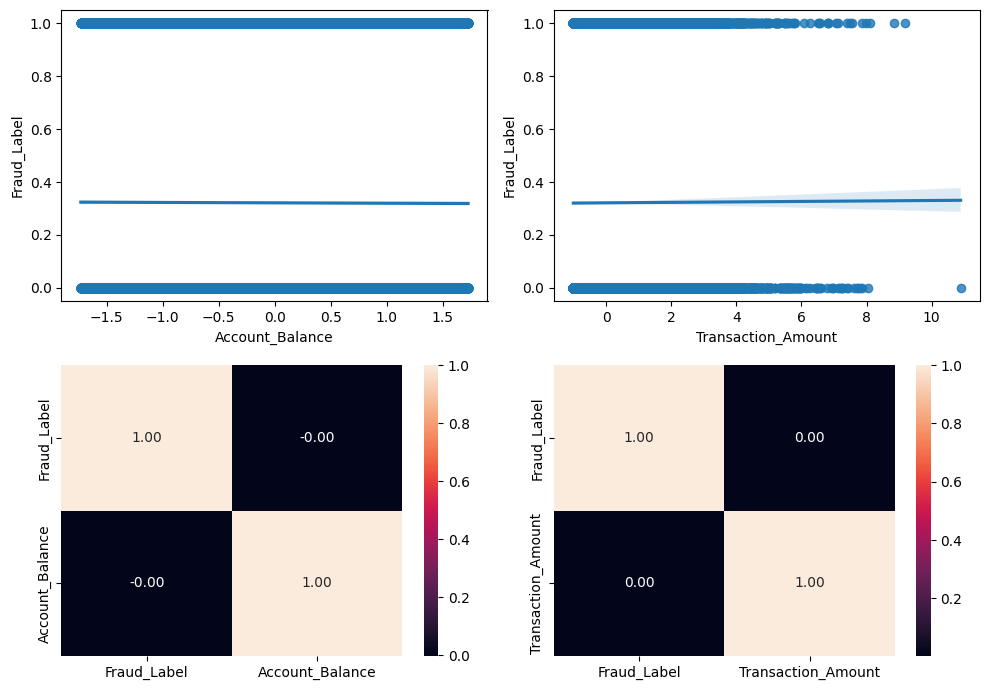

In [30]:
#Fraud_Level - (Account_Balance, Transaction_Amount)
#Correlacion de las variables Nivel de Fraude - (Montos de Balance, Montos de Transacciones)
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0,0], data = df, x = "Account_Balance", y = "Fraud_Label")
sns.heatmap(df[["Fraud_Label", "Account_Balance"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0])
sns.regplot(ax = axis[0,1], data = df, x = "Transaction_Amount", y = "Fraud_Label")
sns.heatmap(df[["Fraud_Label", "Transaction_Amount"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1])
plt.tight_layout()
plt.show()

Account_Balance - Transaction_Amount

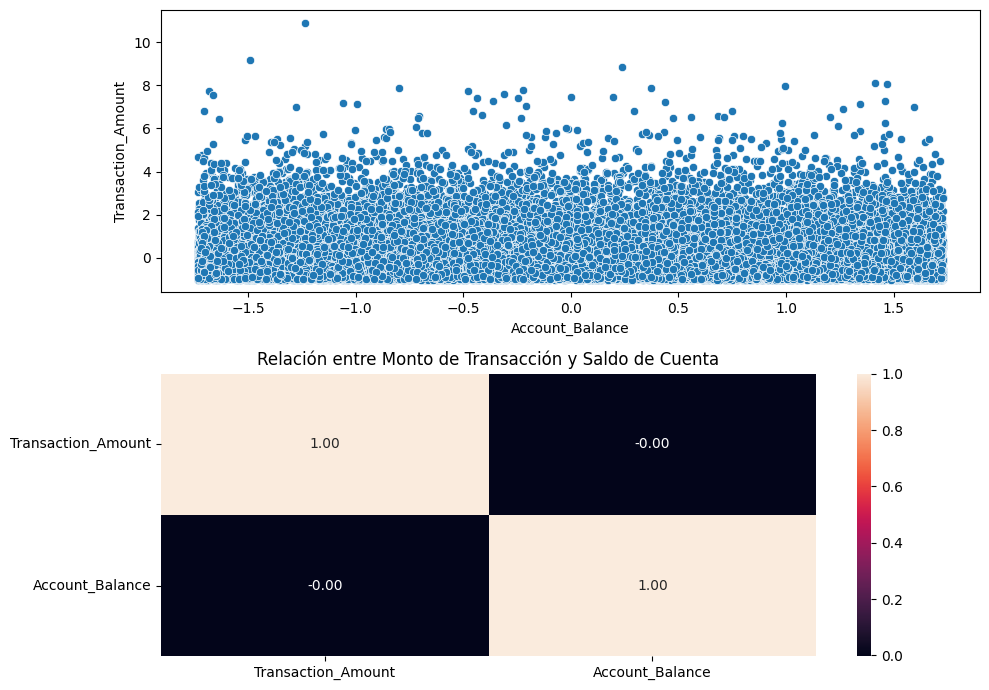

In [31]:
fig, axis = plt.subplots(2, 1, figsize = (10, 7))

sns.scatterplot(ax = axis[0], data = df, x = "Account_Balance", y = "Transaction_Amount")
plt.title('Relación entre Monto de Transacción y Saldo de Cuenta')
sns.heatmap(df[["Transaction_Amount", "Account_Balance"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

plt.tight_layout()
plt.show()


Analisis Categorico-Categorico

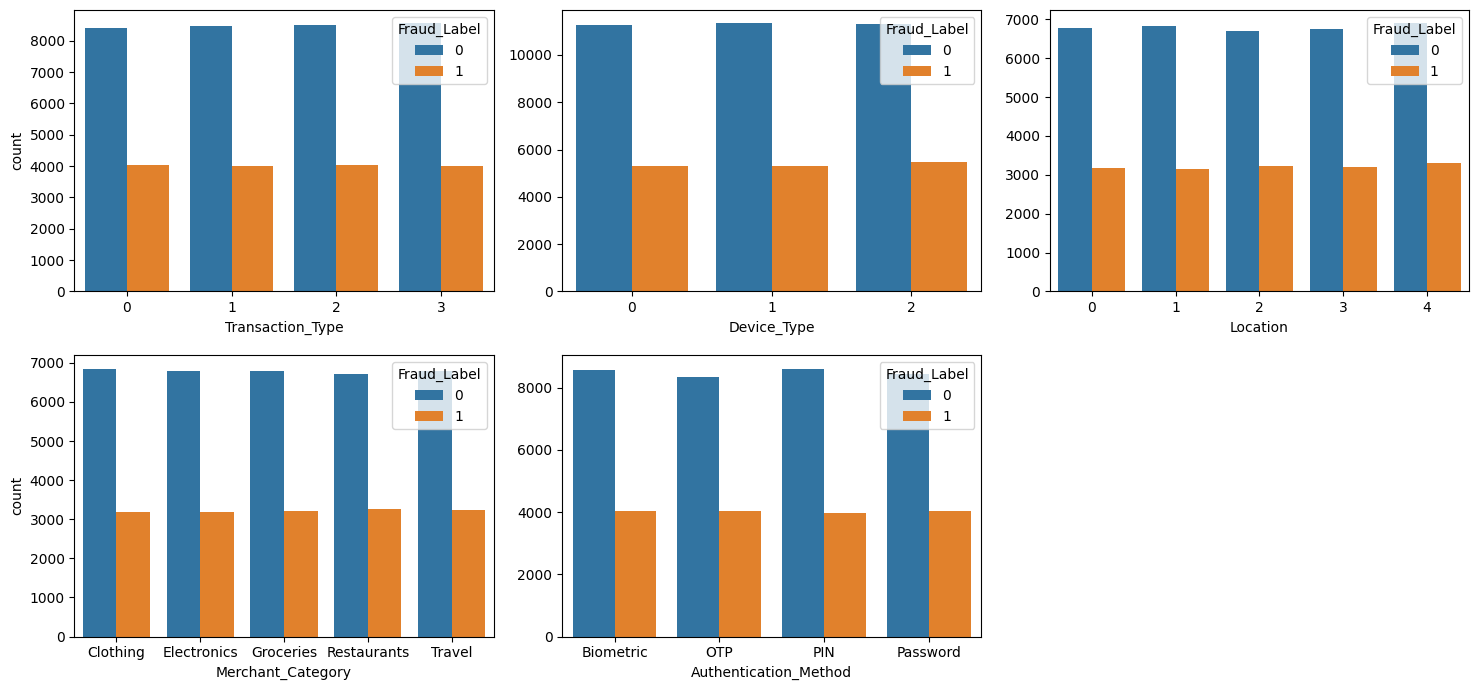

In [32]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = df, x = "Transaction_Type", hue = "Fraud_Label")
sns.countplot(ax = axis[0, 1], data = df, x = "Device_Type", hue = "Fraud_Label").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = df, x = "Location", hue = "Fraud_Label").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = df, x = "Merchant_Category", hue = "Fraud_Label")
sns.countplot(ax = axis[1, 1], data = df, x = "Authentication_Method", hue = "Fraud_Label").set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

Combinacion de la clase con varias predictoras

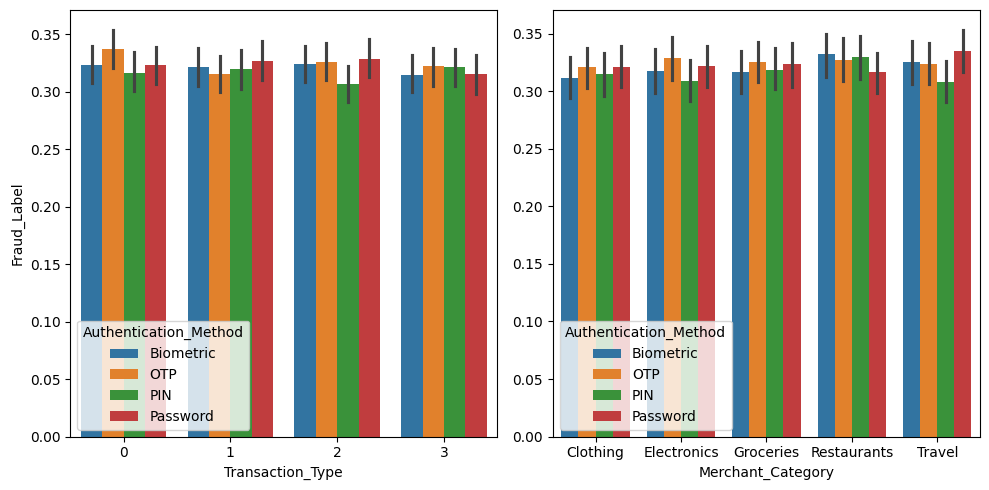

In [33]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = df, x = "Transaction_Type", y = "Fraud_Label", hue = "Authentication_Method")
sns.barplot(ax = axis[1], data = df, x = "Merchant_Category", y = "Fraud_Label", hue = "Authentication_Method").set(ylabel = None)

plt.tight_layout()

plt.show()

Analisis a traves de la Ley de Benford

In [34]:
# Definir función para extraer el primer dígito de un número
def first_digit(series):
    """Extrae el primer dígito no cero de una serie numérica."""
    return series.astype(str).str.extract(r'([1-9])')[0].astype(int)
# Definir nuevamente la distribución esperada según la Ley de Benford
benford_distribution = np.log10(1 + 1 / np.arange(1, 10))
# Crear una copia del DataFrame para evitar advertencias de "SettingWithCopyWarning"
df_filtered = df.copy()
# Filtrar valores cero antes de extraer el primer dígito
df_filtered = df_filtered[(df_filtered['Transaction_Amount'] > 0) &
                          (df_filtered['Account_Balance'] > 0) &
                          (df_filtered['Transaction_Distance'] > 0) &
                          (df_filtered['Risk_Score'] > 0)]
# Aplicar la función corregida
df_filtered.loc[:, 'First_Digit_Transaction'] = first_digit(df_filtered['Transaction_Amount'])
df_filtered.loc[:, 'First_Digit_Balance'] = first_digit(df_filtered['Account_Balance'])
df_filtered.loc[:, 'First_Digit_Distance'] = first_digit(df_filtered['Transaction_Distance'])
df_filtered.loc[:, 'First_Digit_Risk'] = first_digit(df_filtered['Risk_Score'] * 100)  # Escalar para evitar valores pequeños
# Contar la frecuencia de los primeros dígitos observados
transaction_counts = df_filtered['First_Digit_Transaction'].value_counts(normalize=True).sort_index()
balance_counts = df_filtered['First_Digit_Balance'].value_counts(normalize=True).sort_index()
distance_counts = df_filtered['First_Digit_Distance'].value_counts(normalize=True).sort_index()
risk_counts = df_filtered['First_Digit_Risk'].value_counts(normalize=True).sort_index()

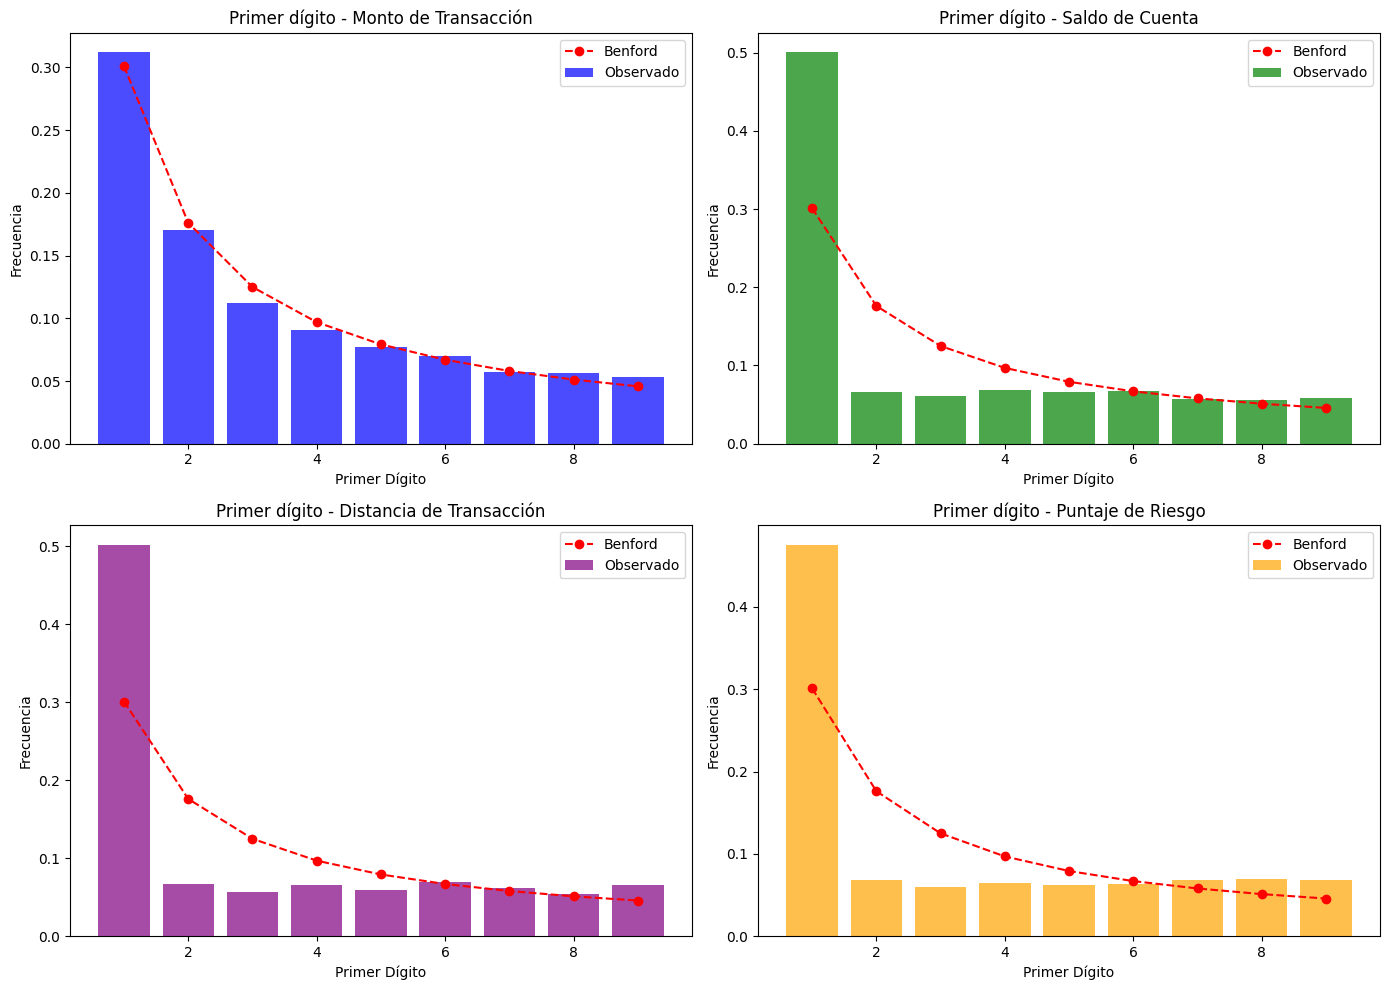

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0, 0].bar(transaction_counts.index, transaction_counts.values, alpha=0.7, label="Observado", color="blue")
axes[0, 0].plot(np.arange(1, 10), benford_distribution, marker='o', linestyle='--', color='red', label="Benford")
axes[0, 0].set_title("Primer dígito - Monto de Transacción")
axes[0, 0].set_xlabel("Primer Dígito")
axes[0, 0].set_ylabel("Frecuencia")
axes[0, 0].legend()
axes[0, 1].bar(balance_counts.index, balance_counts.values, alpha=0.7, label="Observado", color="green")
axes[0, 1].plot(np.arange(1, 10), benford_distribution, marker='o', linestyle='--', color='red', label="Benford")
axes[0, 1].set_title("Primer dígito - Saldo de Cuenta")
axes[0, 1].set_xlabel("Primer Dígito")
axes[0, 1].set_ylabel("Frecuencia")
axes[0, 1].legend()
axes[1, 0].bar(distance_counts.index, distance_counts.values, alpha=0.7, label="Observado", color="purple")
axes[1, 0].plot(np.arange(1, 10), benford_distribution, marker='o', linestyle='--', color='red', label="Benford")
axes[1, 0].set_title("Primer dígito - Distancia de Transacción")
axes[1, 0].set_xlabel("Primer Dígito")
axes[1, 0].set_ylabel("Frecuencia")
axes[1, 0].legend()
axes[1, 1].bar(risk_counts.index, risk_counts.values, alpha=0.7, label="Observado", color="orange")
axes[1, 1].plot(np.arange(1, 10), benford_distribution, marker='o', linestyle='--', color='red', label="Benford")
axes[1, 1].set_title("Primer dígito - Puntaje de Riesgo")
axes[1, 1].set_xlabel("Primer Dígito")
axes[1, 1].set_ylabel("Frecuencia")
axes[1, 1].legend()
plt.tight_layout()
plt.show()

Analisis de correlaciones

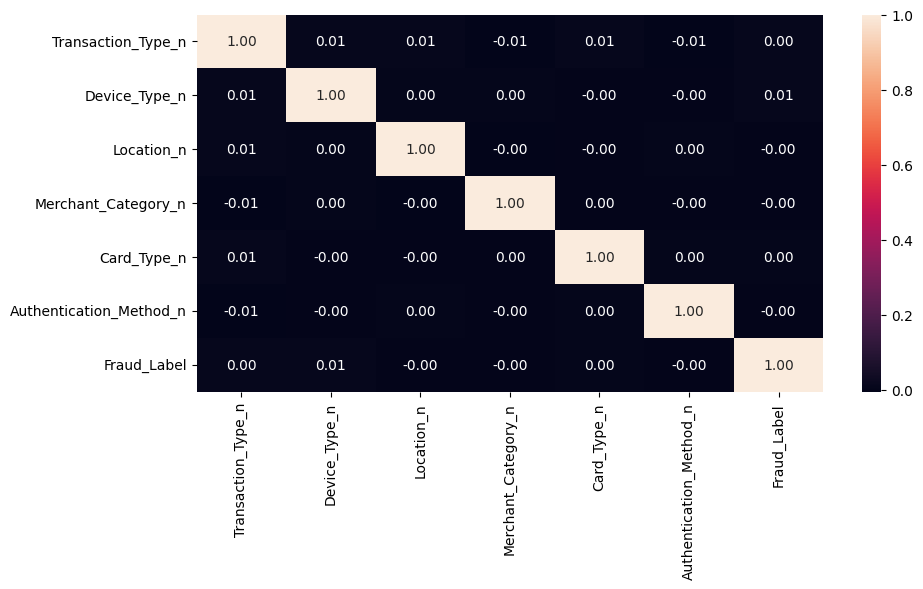

In [36]:
df["Transaction_Type_n"] = pd.factorize(df["Transaction_Type"])[0]
df["Device_Type_n"] = pd.factorize(df["Device_Type"])[0]
df["Location_n"] = pd.factorize(df["Location"])[0]
df["Merchant_Category_n"] = pd.factorize(df["Merchant_Category"])[0]
df["Card_Type_n"] = pd.factorize(df["Card_Type"])[0]
df["Authentication_Method_n"] = pd.factorize(df["Authentication_Method"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[["Transaction_Type_n", "Device_Type_n", "Location_n", "Merchant_Category_n", "Card_Type_n", "Authentication_Method_n", "Fraud_Label"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Analisis numerico-categorico (completo)

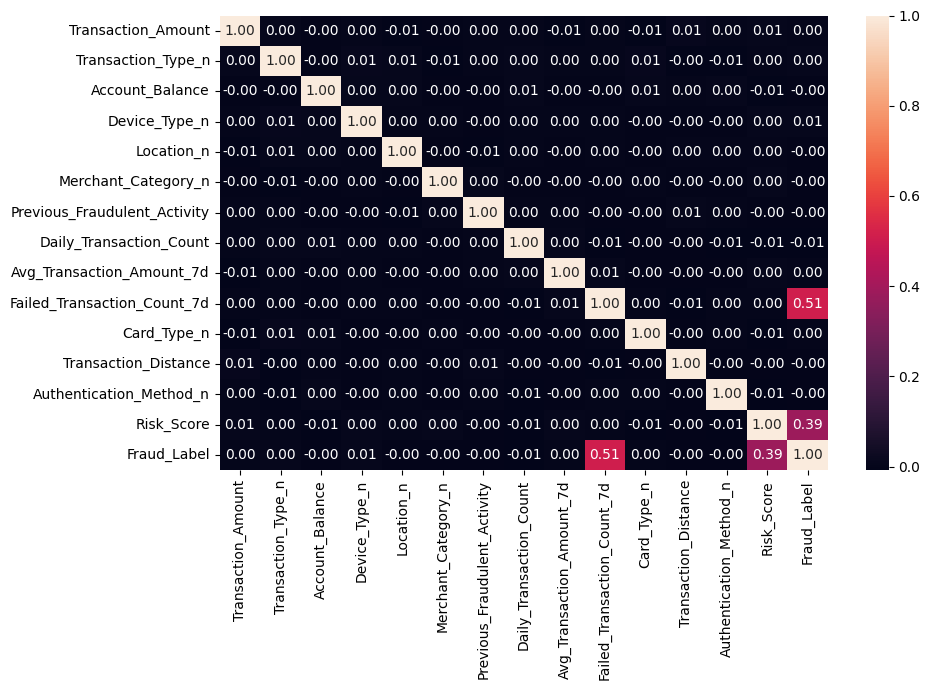

In [37]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(df[["Transaction_Amount", "Transaction_Type_n", "Account_Balance", "Device_Type_n", "Location_n", "Merchant_Category_n", "Previous_Fraudulent_Activity", "Daily_Transaction_Count","Avg_Transaction_Amount_7d", "Failed_Transaction_Count_7d", "Card_Type_n", "Transaction_Distance", "Authentication_Method_n", "Risk_Score", "Fraud_Label"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Analisis de correlacion 

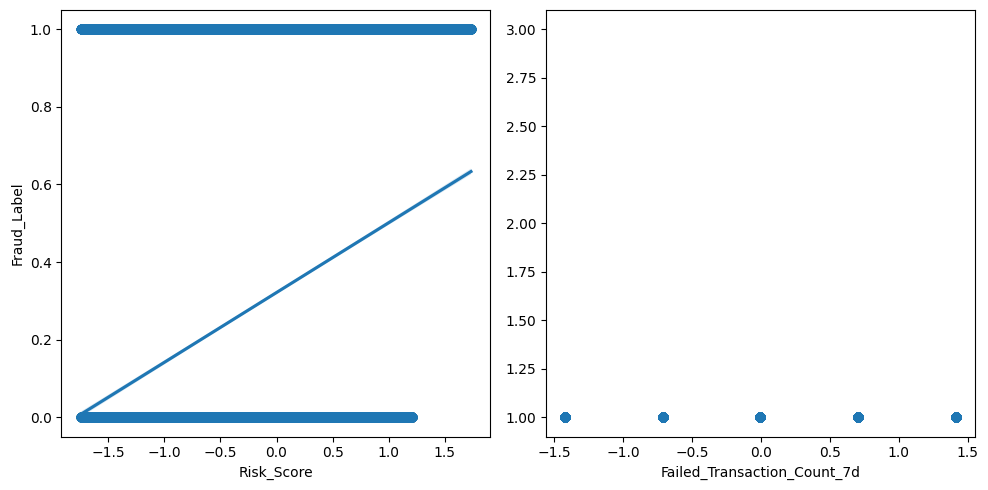

In [38]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = df, x = "Risk_Score", y = "Fraud_Label")
sns.regplot(ax = axis[1], data = df, x = "Failed_Transaction_Count_7d", y = "Fraud_Label").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

Method kendall

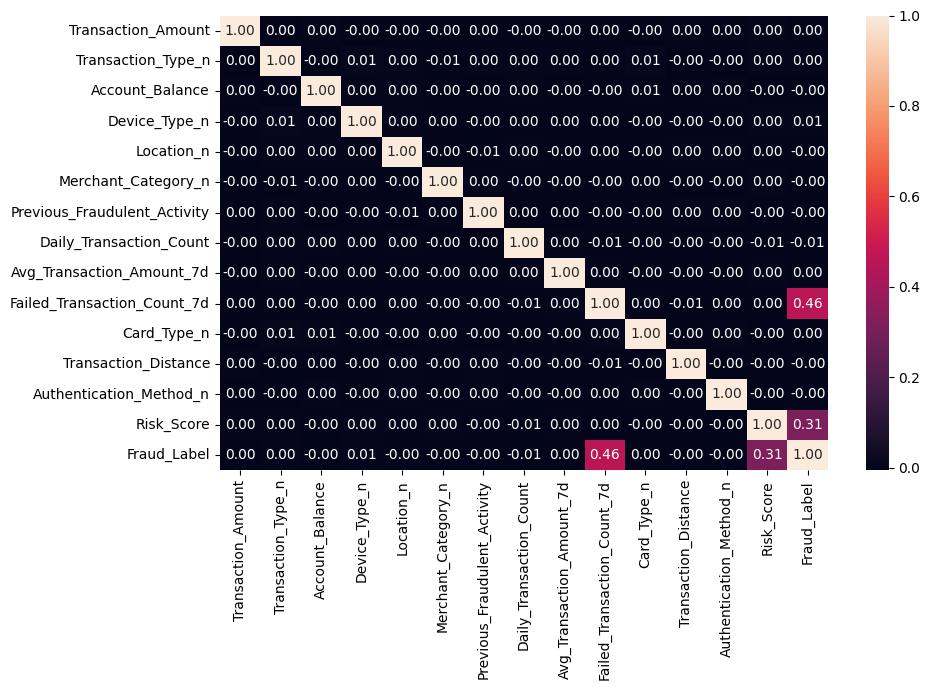

In [39]:
#method= kendall
fig, axis = plt.subplots(figsize = (10, 7))
sns.heatmap(df[["Transaction_Amount", "Transaction_Type_n", "Account_Balance", "Device_Type_n", "Location_n", "Merchant_Category_n", "Previous_Fraudulent_Activity", "Daily_Transaction_Count","Avg_Transaction_Amount_7d", "Failed_Transaction_Count_7d", "Card_Type_n", "Transaction_Distance", "Authentication_Method_n", "Risk_Score", "Fraud_Label"]].corr(method="kendall"), annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()

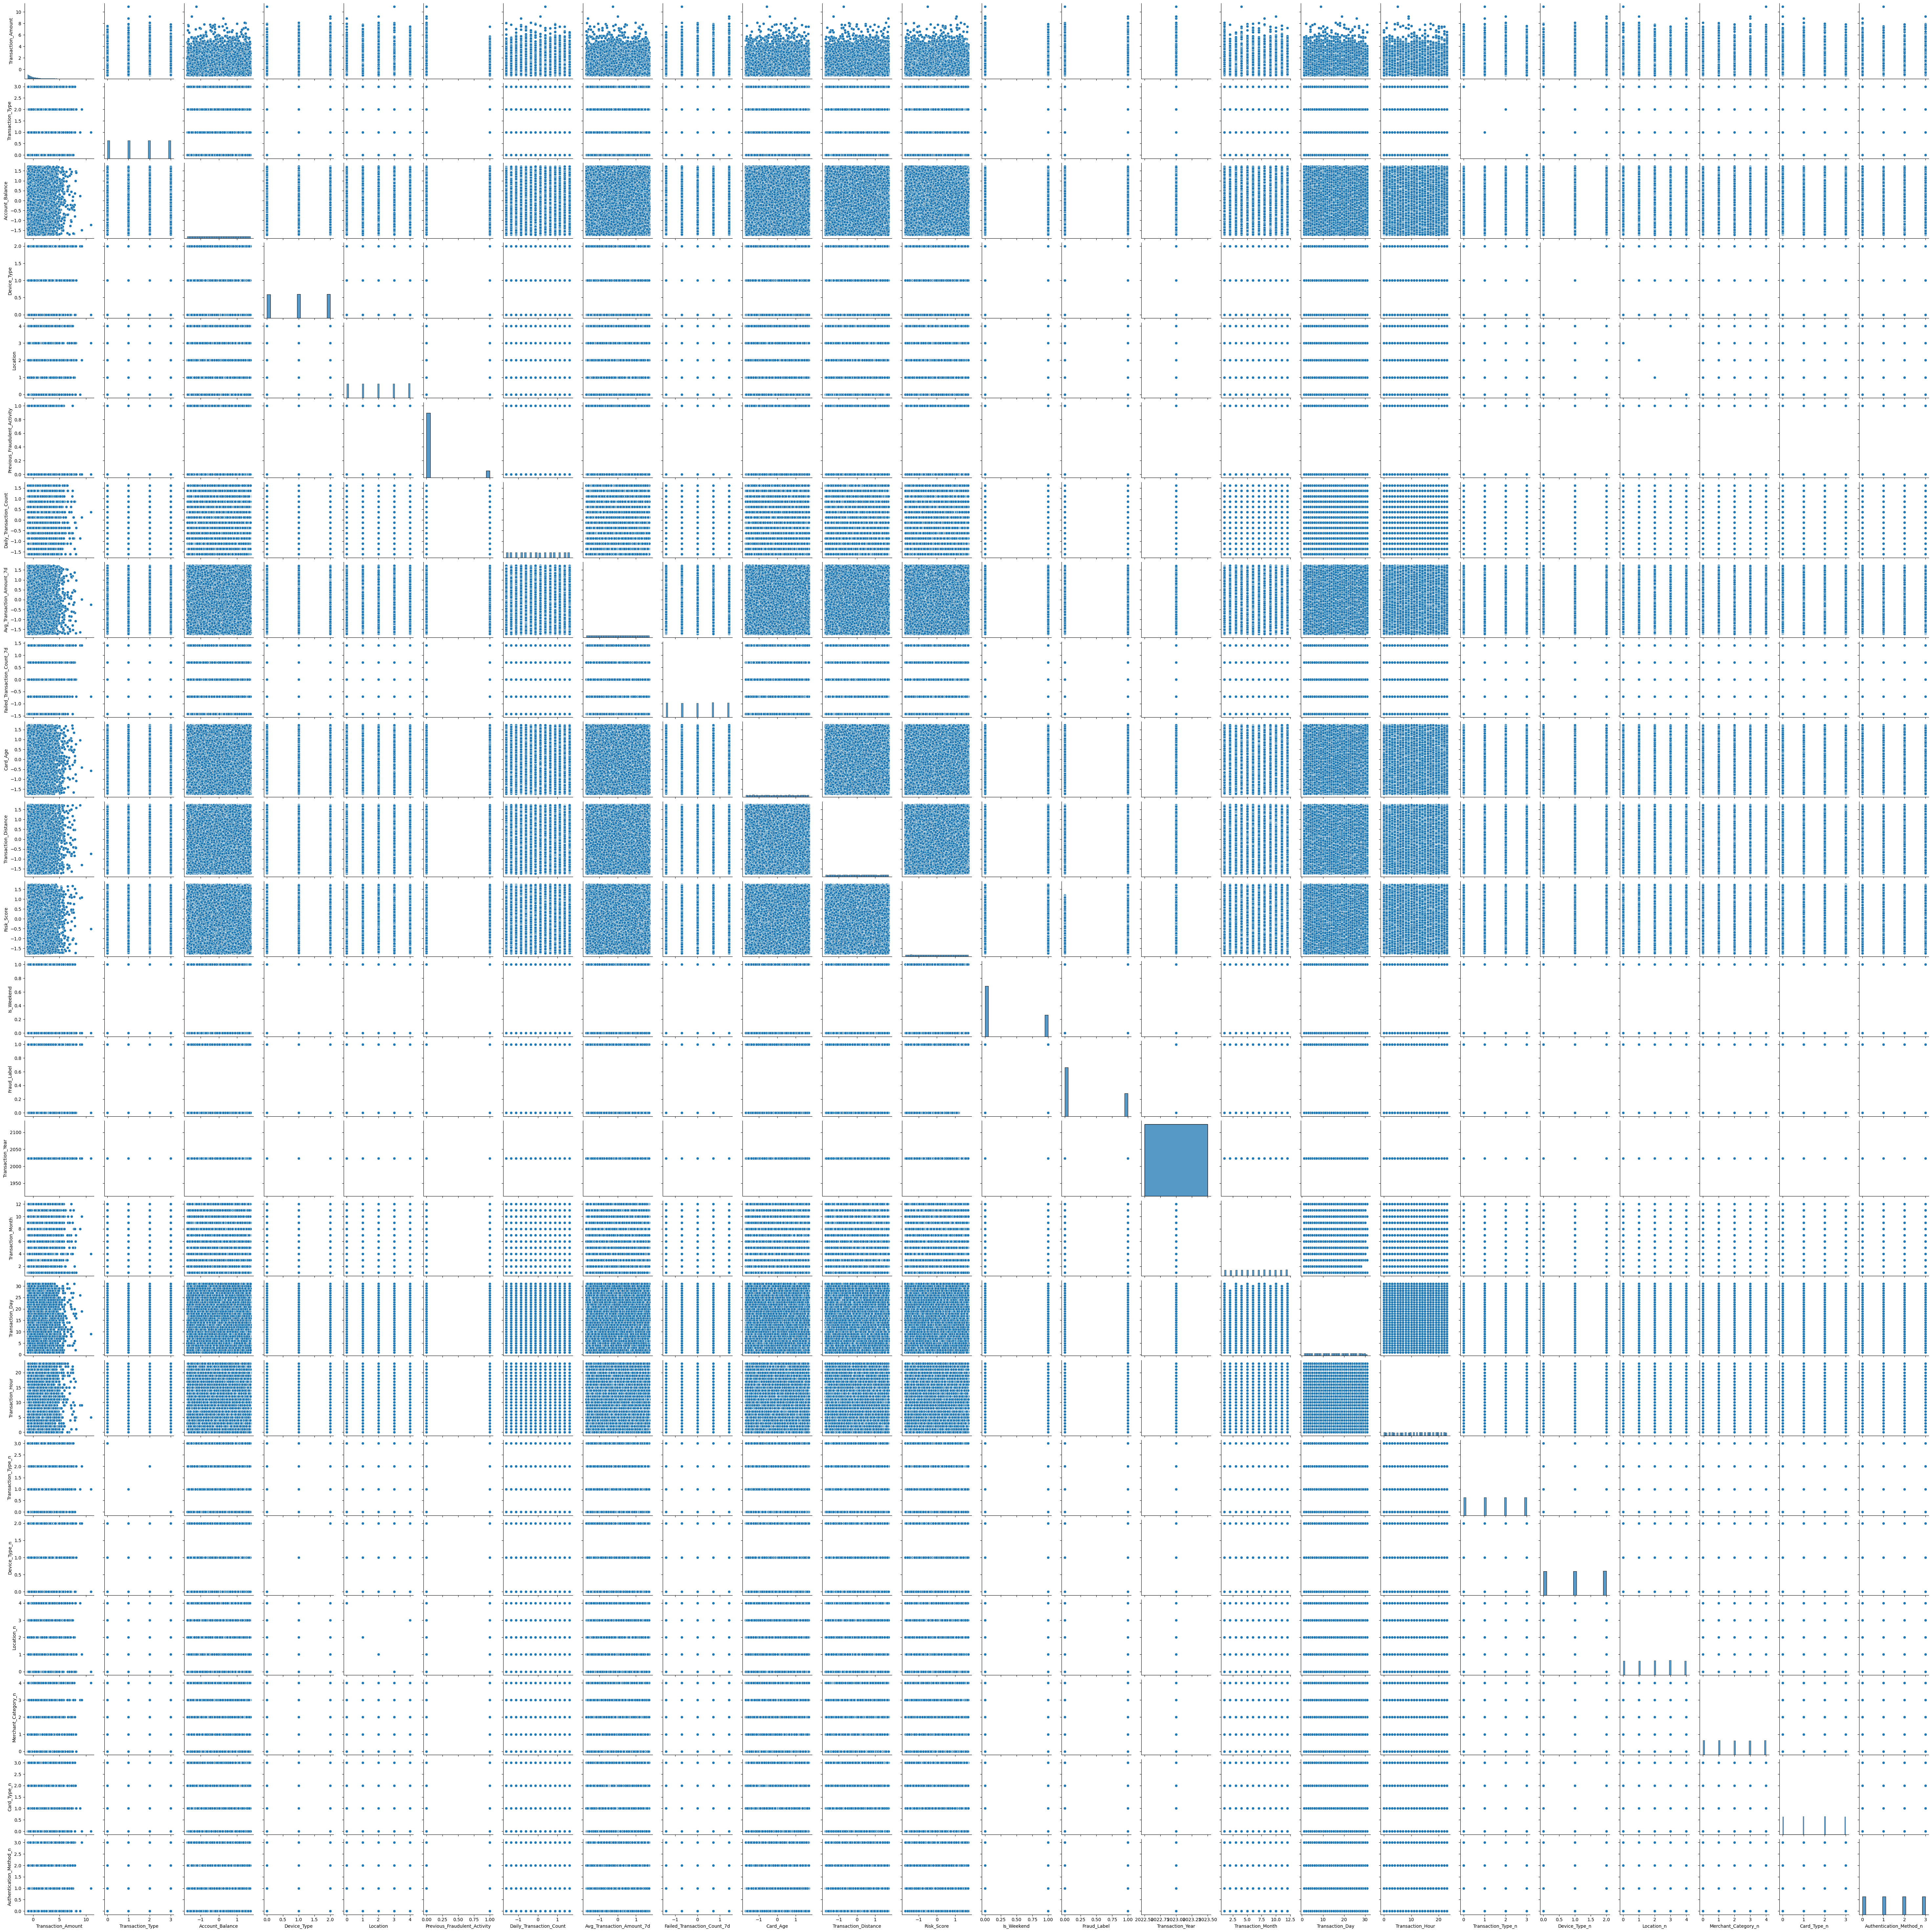

In [40]:
sns.pairplot(data = df)

Ingeniería de características

Análisis de outliers

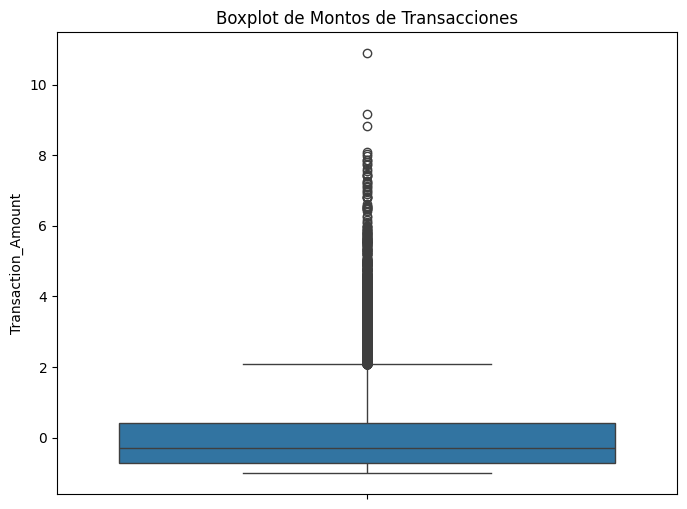

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Transaction_Amount'])
plt.title('Boxplot de Montos de Transacciones')
plt.show()

Deteccion de Outlier para la variable "Transaction_Amount"

In [42]:
transactions_statistics = df["Transaction_Amount"].describe()
transactions_statistics

count    5.000000e+04
mean    -2.856382e-17
std      1.000010e+00
min     -1.007344e+00
25%     -7.167510e-01
50%     -3.014705e-01
75%      3.996653e-01
max      1.089036e+01
Name: Transaction_Amount, dtype: float64

In [43]:
transactions_iqr = transactions_statistics["75%"] - transactions_statistics["25%"]
limite_sup = transactions_statistics["75%"] + 1.5 * transactions_iqr
limite_inf = transactions_statistics["25%"] - 1.5 * transactions_iqr

print(f"El limite superior para outliers es {round(limite_sup, 2)} y el limite inferior es {round(limite_inf, 2)}, con rango intercuartil de {round(transactions_iqr, 2)}")

El limite superior para outliers es 2.07 y el limite inferior es -2.39, con rango intercuartil de 1.12


In [44]:
df = df[(df["Transaction_Amount"] < limite_sup) & (df["Transaction_Amount"] > limite_inf)]
print("Dataset:", len(df))

Dataset: 47740


Análisis de valores faltantes

In [45]:
df.isnull().sum().sort_values(ascending = False)

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
Transaction_Year                0
Transaction_Month               0
Transaction_Day                 0
Transaction_Hour                0
Transaction_Type_n              0
Device_Type_n                   0
Location_n                      0
Merchant_Category_n             0
Card_Type_n                     0
Authentication

In [46]:
df.describe()

Transaction_Amount  Transaction_Type                      Timestamp  \
count        47740.000000      47740.000000                          47740   
mean            -0.145894          1.504776  2023-07-02 17:10:57.349392640   
min             -1.007344          0.000000            2023-01-01 00:01:00   
25%             -0.732027          1.000000            2023-04-02 08:55:30   
50%             -0.347678          2.000000            2023-07-02 21:50:00   
75%              0.271481          3.000000            2023-10-01 13:31:30   
max              2.073530          3.000000            2023-12-31 23:50:00   
std              0.726016          1.117923                            NaN   

       Account_Balance   Device_Type      Location  \
count     47740.000000  47740.000000  47740.000000   
mean          0.001027      1.004001      2.009489   
min          -1.731338      0.000000      0.000000   
25%          -0.867703      0.000000      1.000000   
50%           0.005169      1.000000      2.000000   
75%           0.864708      2.000000      3.000000   
max           1.728232      2.000000      4.000000   
std           1.000393      0.816448      1.418773   

       Previous_Fraudulent_Activity  Daily_Transaction_Count  \
count                  47740.000000             47740.000000   
mean                       0.098157                -0.001194   
min                        0.000000                -1.605418   
25%                        0.000000                -0.862769   
50%                        0.000000                -0.120121   
75%                        0.000000                 0.870077   
max                        1.000000                 1.612725   
std                        0.297529                 1.000324   

       Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d  ...  \
count               47740.000000                 47740.000000  ...   
mean                   -0.000442                    -0.000548  ...   
min                    -1.734831                    -1.416672  ...   
25%                    -0.871277                    -0.709587  ...   
50%                     0.005751                    -0.002503  ...   
75%                     0.867802                     0.704581  ...   
max                     1.730984                     1.411665  ...   
std                     1.000098                     1.000092  ...   

       Transaction_Year  Transaction_Month  Transaction_Day  Transaction_Hour  \
count           47740.0       47740.000000     47740.000000      47740.000000   
mean             2023.0           6.533326        15.711961         11.524424   
min              2023.0           1.000000         1.000000          0.000000   
25%              2023.0           4.000000         8.000000          6.000000   
50%              2023.0           7.000000        16.000000         12.000000   
75%              2023.0          10.000000        23.000000         17.000000   
max              2023.0          12.000000        31.000000         23.000000   
std                 0.0           3.446180         8.814114          6.897031   

       Transaction_Type_n  Device_Type_n    Location_n  Merchant_Category_n  \
count        47740.000000   47740.000000  47740.000000         47740.000000   
mean             1.497235       1.004001      2.007541             1.998618   
min              0.000000       0.000000      0.000000             0.000000   
25%              0.000000       0.000000      1.000000             1.000000   
50%              1.000000       1.000000      2.000000             2.000000   
75%              2.000000       2.000000      3.000000             3.000000   
max              3.000000       2.000000      4.000000             4.000000   
std              1.117930       0.816448      1.411866             1.415886   

        Card_Type_n  Authentication_Method_n  
count  47740.000000             47740.000000  
mean       1.497172                 1.498366  
min        0.000000       

Guardamos el nuevo DataSet

In [47]:
df.to_csv("../data/processed/df.csv", index = False)

Dividimos el DataSet

In [48]:
df.isnull().sum().sort_values(ascending = False)

from sklearn.model_selection import train_test_split

num_variables = ["Transaction_Amount", "Transaction_Type_n", "Account_Balance", "Device_Type_n", "Merchant_Category_n", "Previous_Fraudulent_Activity","Avg_Transaction_Amount_7d", "Failed_Transaction_Count_7d", "Card_Type_n", "Transaction_Distance", "Authentication_Method_n", "Risk_Score"]


X = df[num_variables]
y = df["Fraud_Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Analisis de Modelos

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

modelos = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(max_depth=10),
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=10),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

accuracy_scores = {}
for name, model in modelos.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)



In [50]:
import pandas as pd

# Convertimos el diccionario de accuracy a un DataFrame
accuracy_df = pd.DataFrame({
    "Modelo": list(accuracy_scores.keys()),
    "Accuracy": list(accuracy_scores.values())})

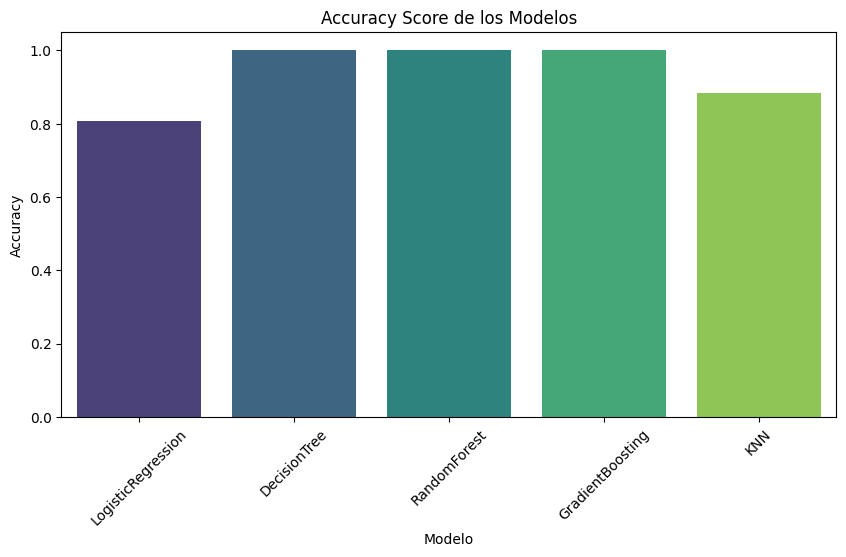

In [51]:
plt.figure(figsize=(10, 5))
colors = sns.color_palette("viridis", len(accuracy_df))
sns.barplot(x=accuracy_df["Modelo"], y=accuracy_df["Accuracy"], hue=accuracy_df["Modelo"], palette=colors, legend=False)
plt.xticks(rotation=45)
plt.title("Accuracy Score de los Modelos")
plt.show()

Evaluacion de Modelos

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
results = {'Modelo': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}


for i in modelos:
    obj = modelos[i]
    obj.fit(X_train, y_train)
    obj_pred = obj.predict(X_test)

 
    accuracy = accuracy_score(y_test, obj_pred>0.5,)
    precision = precision_score(y_test, obj_pred>0.5,average='weighted')
    recall = recall_score(y_test, obj_pred>0.5,average='weighted')
    f1 = f1_score(y_test, obj_pred>0.5,average='weighted')

  
    results['Modelo'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)


results_df = pd.DataFrame(results)
results_df


Modelo  Accuracy  Precision    Recall  F1-Score
0  LogisticRegression  0.807918   0.804684  0.807918  0.805802
1        DecisionTree  1.000000   1.000000  1.000000  1.000000
2        RandomForest  1.000000   1.000000  1.000000  1.000000
3    GradientBoosting  1.000000   1.000000  1.000000  1.000000
4                 KNN  0.883850   0.882383  0.883850  0.882214

Seleccion de Modelo - Random Forest

**Construccion del Modelo**

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Creamos el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[6539    0]
 [   0 3009]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6539
           1       1.00      1.00      1.00      3009

    accuracy                           1.00      9548
   macro avg       1.00      1.00      1.00      9548
weighted avg       1.00      1.00      1.00      9548


Accuracy Score: 1.0


Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
print(len(rf_model.estimators_))


100


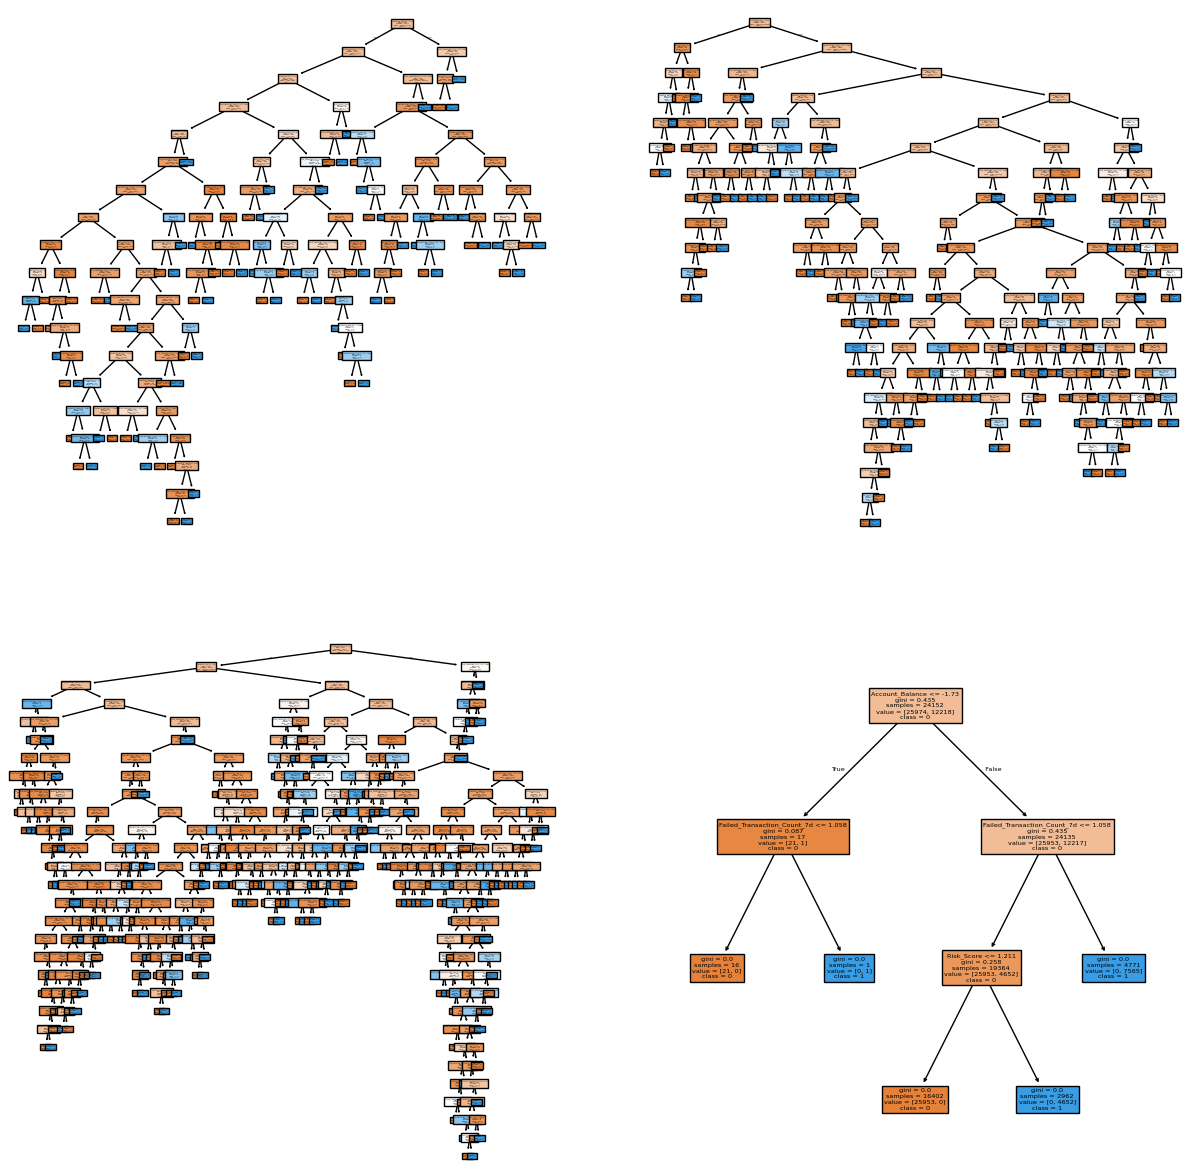

In [56]:
import matplotlib.pyplot as plt
from sklearn import tree

# Crear una figura con subplots
fig, axis = plt.subplots(2, 2, figsize=(15, 15))

# Mostrar los 4 primeros árboles del modelo Random Forest
tree.plot_tree(rf_model.estimators_[0], ax=axis[0, 0], feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)
tree.plot_tree(rf_model.estimators_[1], ax=axis[0, 1], feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)
tree.plot_tree(rf_model.estimators_[2], ax=axis[1, 0], feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)
tree.plot_tree(rf_model.estimators_[3], ax=axis[1, 1], feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)

plt.show()



In [57]:
y_pred = model.predict(X_test)
y_pred


array([0, 0, 0, ..., 1, 1, 0], shape=(9548,))

In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [59]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

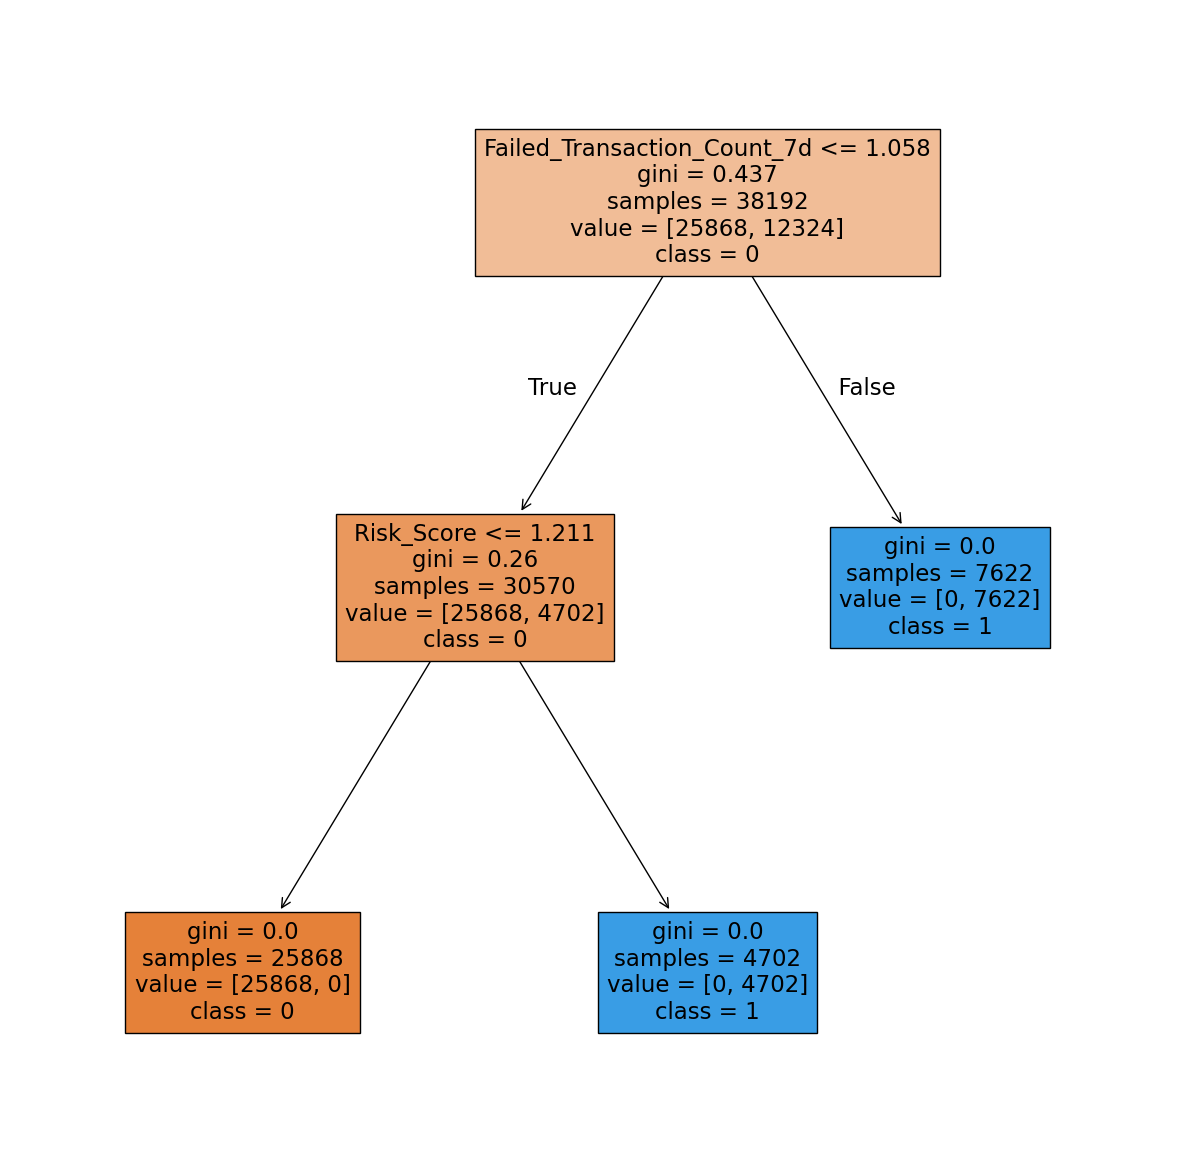

In [60]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [61]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0], shape=(9548,))

In [62]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [63]:
#Reporte de clasificacion

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6539
           1       1.00      1.00      1.00      3009

    accuracy                           1.00      9548
   macro avg       1.00      1.00      1.00      9548
weighted avg       1.00      1.00      1.00      9548



In [64]:
from pickle import dump

dump(model, open("../models/randforest_classifier_.sav", "wb"))